In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
!gdown 1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh

Downloading...
From: https://drive.google.com/uc?id=1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh
To: C:\Users\Acer\cars24-car-price-clean.csv

  0%|          | 0.00/7.10M [00:00<?, ?B/s]
  7%|7         | 524k/7.10M [00:00<00:02, 3.14MB/s]
 22%|##2       | 1.57M/7.10M [00:00<00:01, 4.79MB/s]
 37%|###6      | 2.62M/7.10M [00:00<00:00, 5.52MB/s]
 52%|#####1    | 3.67M/7.10M [00:00<00:00, 5.76MB/s]
 66%|######6   | 4.72M/7.10M [00:00<00:00, 5.69MB/s]
 81%|########1 | 5.77M/7.10M [00:01<00:00, 5.64MB/s]
 96%|#########5| 6.82M/7.10M [00:01<00:00, 6.18MB/s]
100%|##########| 7.10M/7.10M [00:01<00:00, 5.74MB/s]


In [3]:
df = pd.read_csv('cars24-car-price-clean.csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


# Simple Linear Regression 
## Univariate Analysis

In [9]:
X = df['model'].values #feature 
y = df['selling_price'].values #target 

In [10]:
X.shape,y.shape

((19820,), (19820,))

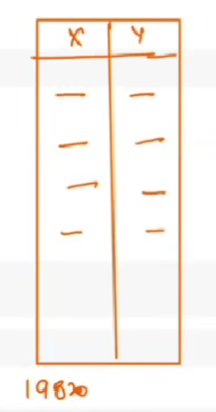

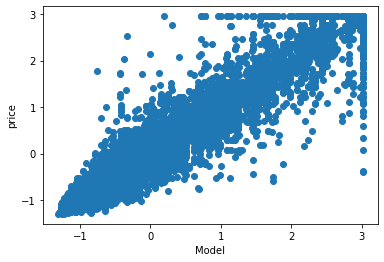

In [11]:
plt.scatter(X,y)
plt.xlabel('Model')
plt.ylabel('price')
plt.show()

- the best line should be 
- the equation of the line would be : y = w1x + w0
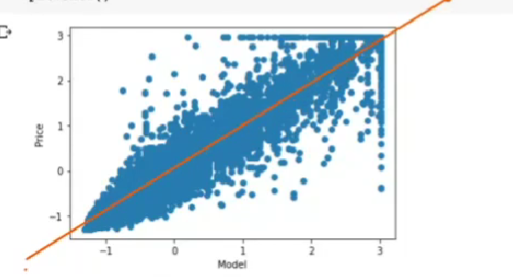

#### writing predict fuction from scratch 

In [12]:
def predict(x, weights):
    y_hat = weights[1]*x + weights[0]
    return y_hat

#### how to write the Meas square error 

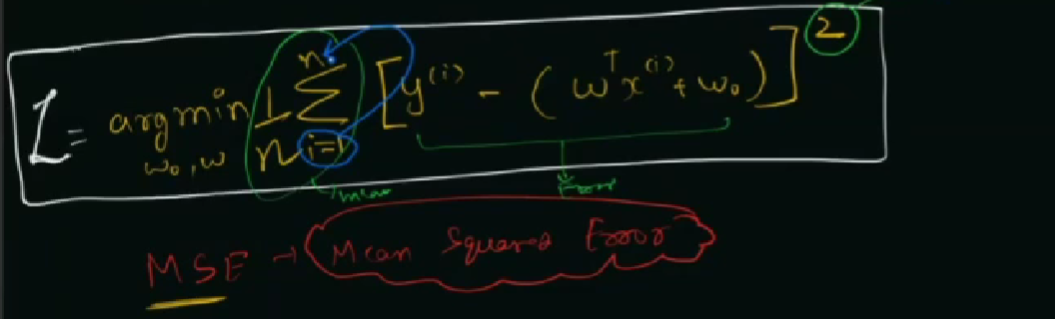

In [18]:
# for writing the loss fuction we need : i = 1 - n (all x points) , Y(i) , y_hat = weights
def mse(X, Y, weights):
    n = X.shape[0]
    total_error = 0.0
    
    for i in range(n):
        y_hat = predict(X[i] , weights)
        total_error += (Y[i] - y_hat)**2
        
    return total_error/n

#### Optimisation 

- the paramenters of this quation are the weights and just weights. 
- x and y are fixed , the only things that change in time are the weights and changing that wikll give ius the arg min or the loss fuction or the total error 
- we have more than one independent variable and thus we go for partial derivative and not just derivative 
- that ie dL/dw0 and dL/dw1
- find these 2 values and then done 
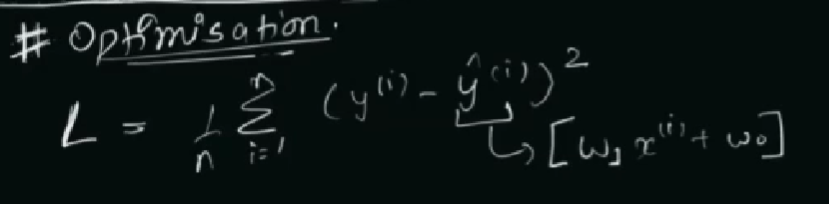

#### finding partial derivative 

- dL/dw0 and dL/dw1
- 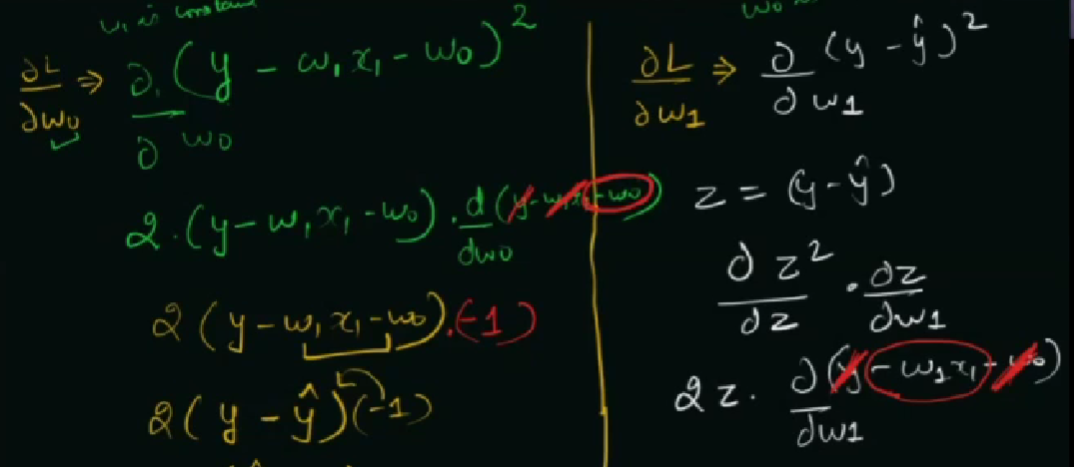
- 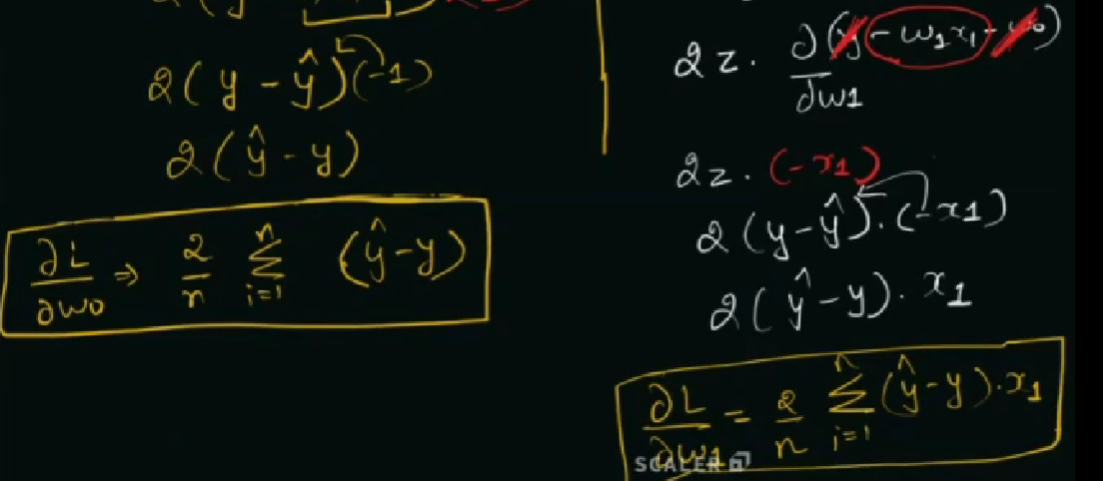
- why did we do this ?? :
    - to fing the local minima 
    - to do the gradient descent 
    - to update the weights 

#### Gradient Descent 

- 3 steps
    - ranfomly initialize variable 
    - repeat until convergance / n iteration times 
    - we have to repeat for all the w's , in this case we have only 1 variable so only w1 and w0 
    - if the nu,ber of freatures increas so does the w's
    -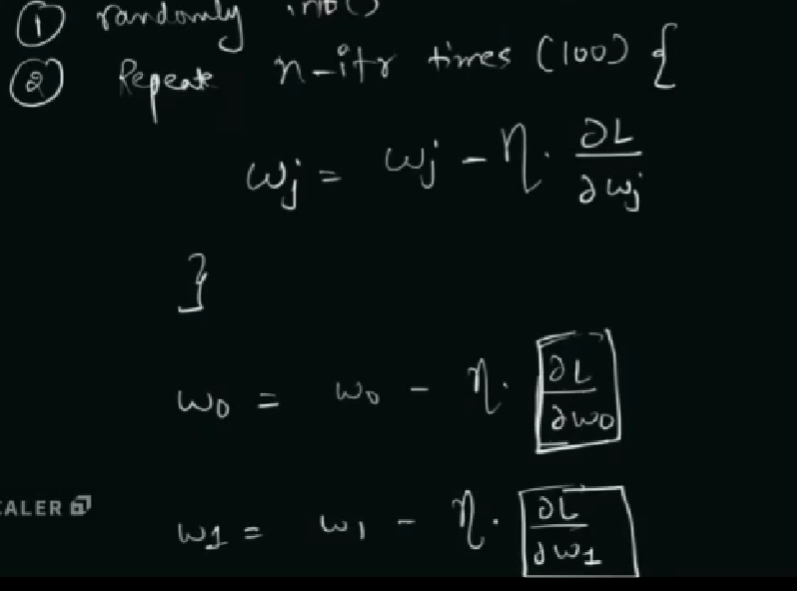

#### fuction together 

In [31]:
def predict(x, weights):
    y_hat = weights[1]*x + weights[0]
    return y_hat

In [32]:
def gradient(X, Y, weights):
    n = X.shape[0]
    grad = np.zeros((2,))
    
    for i in range(n):
        y_hat = predict(X[i] , weights)
        grad[0] += (y_hat - Y[i])
        grad[1] += (y_hat - Y[i])*X[i]
        
    return 2*grad/n 

In [37]:
def gradient_descent(X, Y, N_iter = 100, eta = 0.1):
    weights = np.random.randn(2,)
    
    for i in range(N_iter):
        grad = gradient(X, Y, weights)
        weights[0] = weights[0] - eta*grad[0] 
        weights[1] = weights[1] - eta*grad[1]
    return weights.round(2)

In [46]:
opt_weights = gradient_descent(X, y)

In [47]:
opt_weights

array([0.  , 0.97])

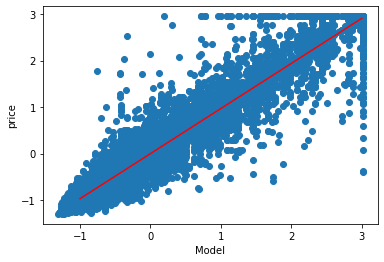

In [45]:
plt.scatter(X,y)
plt.xlabel('Model')
plt.ylabel('price')

plt.plot([-1,3], [-0.97,2.91] , c = 'red')
plt.show()

### Evaluation Metric 

- checks the performance of the model. Accuracy is not the right word to use 


- for a prediction the simplest thing to predict is to make a dumb model : that dumb model can be to predict the mean of the output 
- we can do the mean model or meadian model 
- this dumb model will always tpredict the ybar ie the mean. 
- 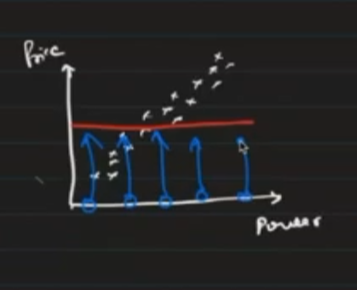
- no matter what the value input is, it'll always predict the mean.


### R2 score / R squared 

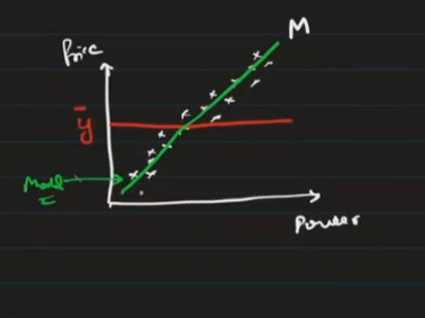



- we need to check how good out green model is compared to dumb model 



- 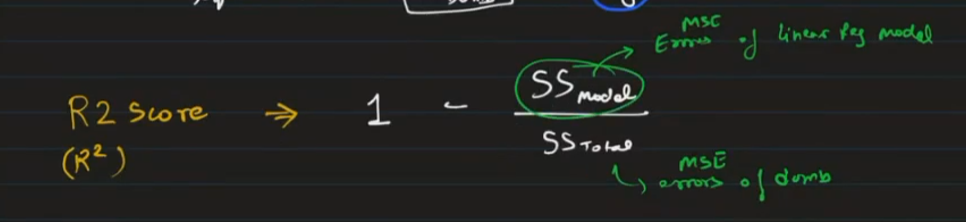
- 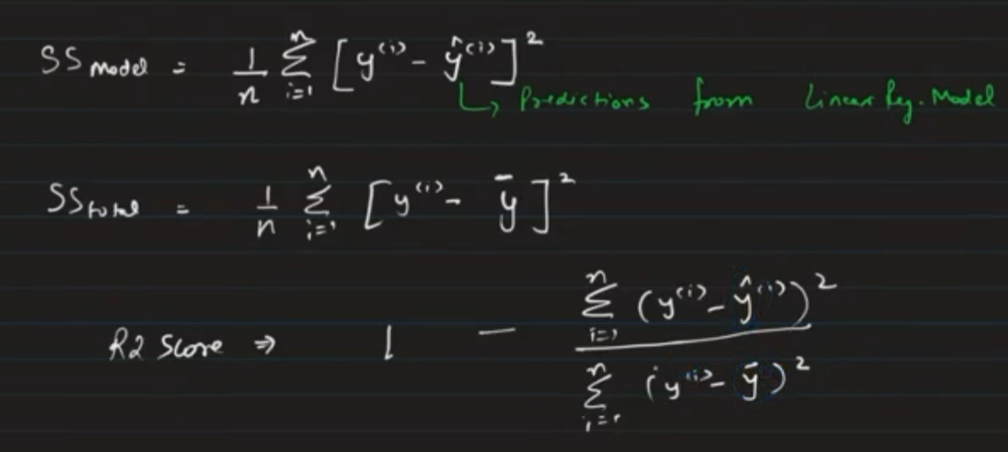



- for the ss_dumb the error is y[i] - y_bar because the model always predicts y_bar

- is r2 is bigger then the ssmodel error is less and thats the best thing to happen 

#### Best value of R2

- the best value is 1 : How ?? : if the ssmodel is 0 ie when the error is zero or when all the sata points are lying in straight line 


- what if R2 = 0 
    - then the ssmodel / ss total = 1 ie the model is the same as the mean model this implies our model build is dumb model 
    

- will R2 go -ve ??
    - in theory its Yes. 
    - practically never happens 
    - R2 = 1 - ssmodel/sstotal : it turns negative when the ssmodel is >>>> ssmodel ie our model is worse than dumb model 
        - Green is our model and red is dumb 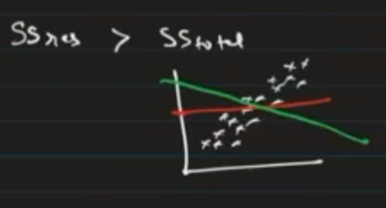

What is the good R2 ??
- it depends on the business case 
- for a cancer prediction 92 percentage is still bad because 8 percent error is too risky 
- for car price prediction 92 percentage is good to best. 

#### Code for R2

In [48]:
opt_weights #these are the w and w0

array([0.  , 0.97])

In [50]:
X

array([-1.12568266, -0.3332271 , -0.78980745, ..., -0.4486842 ,
        0.32802721,  1.03651397])

In [53]:
#y_hat can be computed from the predict fuction used above 
# use list comprehension to take all points and compute the y hat

y_hat = np.array([predict(points , opt_weights) for points in X])

In [54]:
y_hat[:5]

array([-1.09191218, -0.32323029, -0.76611323, -0.87810662, -0.01270316])

In [55]:
y[:5]

array([-1.11104589, -0.22394353, -0.91505816, -0.89236484, -0.18268296])

In [58]:
def r2_score(y, y_hat):
    denom = np.sum((y - y.mean())**2)
    num   = np.sum((y - y_hat)**2) # we dont have y_hat now so we go up and compute y hat 
    
    return 1 - num/denom

In [60]:
r2_score(y, y_hat) #we havent used only 1 feature till now 

0.9312991715379575

### Sklearn

In [64]:
#step 1 - import algo
from sklearn.linear_model import LinearRegression

In [65]:
#step 2 - create model 
model = LinearRegression()

In [70]:
X = X.reshape(-1,1)

In [71]:
#3 train model 
model.fit(X, y) 

LinearRegression()

In [73]:
y_hat = model.predict(X)
y_hat

array([-1.08634131, -0.32158118, -0.76220457, ..., -0.43300319,
        0.31656303,  1.00028896])

In [74]:
#r2 score 
model.score(X,y)

0.9313236629576508

the model has learned opt_weights 

In [76]:
model.coef_

array([0.96505112])

In [77]:
model.intercept_ 

-1.1873193566831424e-16

### Multiple Linear Reg / Multi variate LR

- The general equation of line is y_hat = wT * X + w0 
- the Q here is why not take the w0 inside the wT and do matrix multiplication with X ??
    - w = < w1 + w2 + w3 + .....+ wd>
    - X = < x1 + x2 + x3 + ......+ xd>
    
    - from here we take a new column x0 which will always be 1 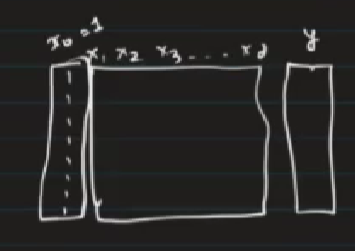
    - w = < w0 + w1 + w2 + w3 + .....+ wd>
    - X = < x0 + x1 + x2 + x3 + ......+ xd>
    - now y_hat = wT * x 
    

Dimension change from 
- 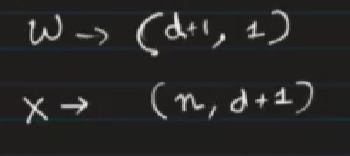 to 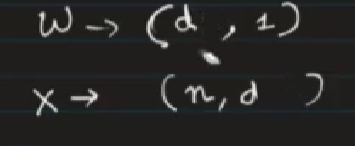

- What is the use of the above procedure ??
    - we can take just w dot x and not transpose 
    - now we can write predict fn as y_hat = np.dot(X,w)
    - 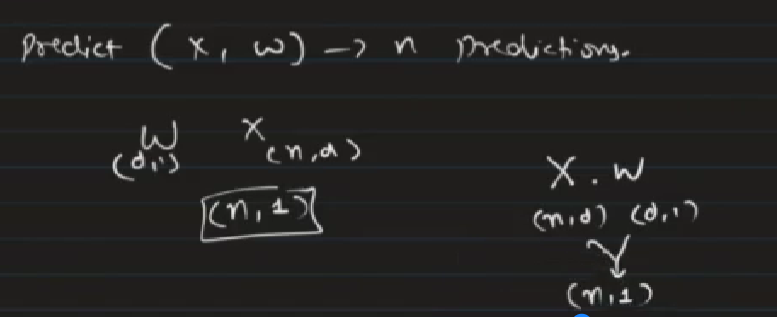

#### Code 

In [78]:
df

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19815,-0.017641,0.762867,0.218923,0.950886,-0.215410,-0.694202,-0.762867,0.724475,0.091865,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728
19816,0.549692,1.388540,-0.776546,-0.466159,-0.198054,-0.156899,-1.388540,-0.433854,0.112857,-0.800710,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,-2.249703,2.354446
19817,-0.481822,0.137194,0.170967,0.380810,0.042999,0.120577,-0.137194,-0.240799,-0.448684,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728
19818,1.168601,0.450030,72.355997,-0.815185,1.356256,0.935579,-0.450030,0.123346,0.328027,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,-2.249703,2.354446
